In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


df_DA_US['salary_year_avg'].sample(10)

320217     42500.0
226468     80000.0
80815      76579.0
728352     95700.0
660360    111175.0
395244     80000.0
387664     82500.0
276663    112050.0
201652    107500.0
282786    125000.0
Name: salary_year_avg, dtype: float64

<Axes: >

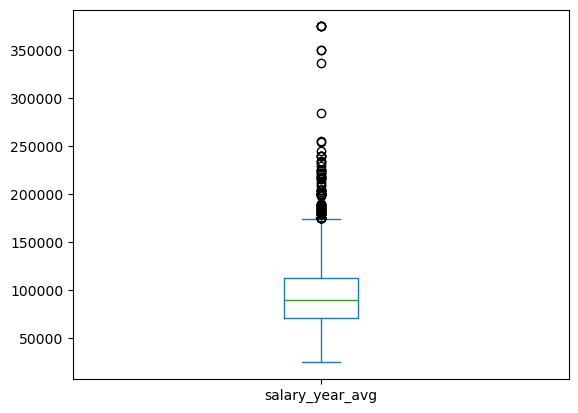

In [3]:
df_DA_US['salary_year_avg'].plot(kind= 'box')

{'whiskers': [<matplotlib.lines.Line2D at 0x22892eb6590>,
 'caps': [<matplotlib.lines.Line2D at 0x22892eb79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22892eb5cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x22892ec4d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22892ec5650>],
 'means': []}

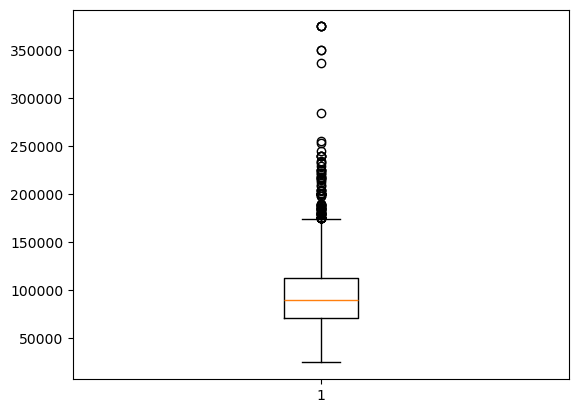

In [4]:
plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

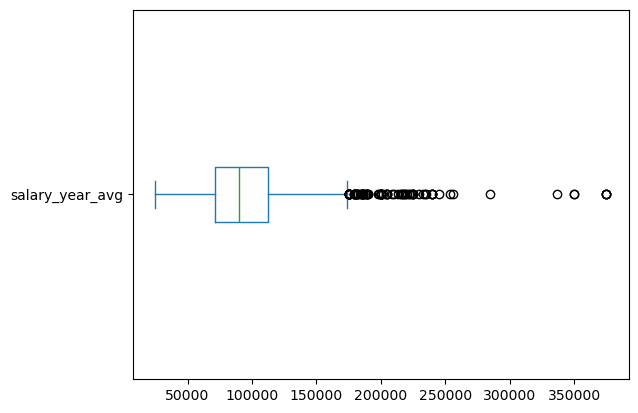

In [5]:
df_DA_US['salary_year_avg'].plot(kind= 'box', vert= False)

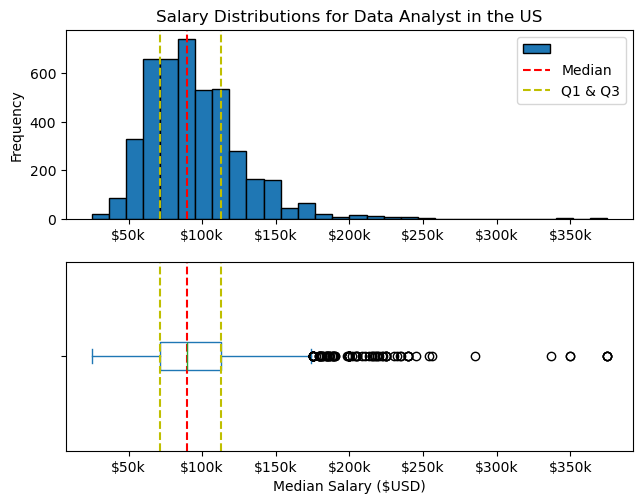

In [6]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad= 1)

df_DA_US['salary_year_avg'].plot(kind= 'hist', ax= ax[0], bins= 30, edgecolor= 'black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color= 'r', linestyle= '--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color= 'y', linestyle= '--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color= 'y', linestyle= '--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind= 'box', ax= ax[1], vert= False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color= 'r', linestyle= '--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color= 'y', linestyle= '--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color= 'y', linestyle= '--')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13604\4109115194.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert= False)


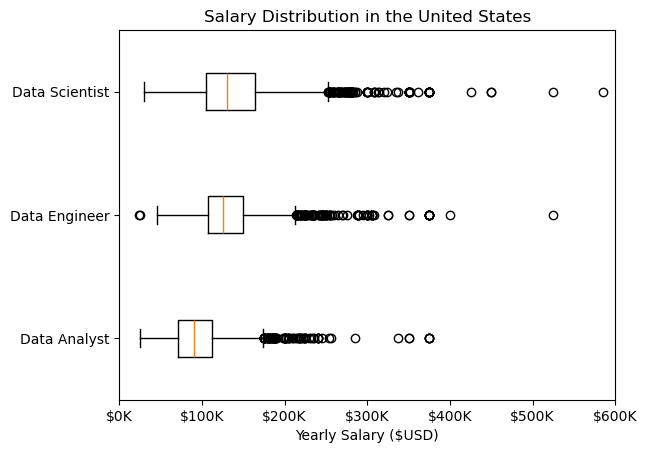

In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job_titles
# Only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset= ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert= False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlim(0, 600000)
plt.show()